In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf as erf
from scipy.integrate import solve_ivp

# Problem 1


In [3]:
def fixed(x0, f, maxIter = 200, TOL = 1e-10):
    
    next_x = x0
    for i in range(maxIter):
        current_x = next_x
        next_x = f(current_x)
        
        if np.abs(next_x-current_x)<= TOL:
            print('Reached TOL at', i)
            break
        
        
    return current_x



def func(t):
    return np.cos(np.exp(-t))/2


fixed(0,func)

Reached TOL at 15


0.38963188253417425

# Problem 2

In [160]:
#Simple code that verifies the SVD

A = np.array([[1,0,1],[0,-1,0],[0,1,0]]) 


V = np.array([[-1/np.sqrt(2),1/np.sqrt(2),0],[0,0,1],[1/np.sqrt(2),1/np.sqrt(2),0]]) #Matrices as computed in rapport.
U = np.array([[0,1,0],[1/np.sqrt(2),0,-1/np.sqrt(2)],[1/np.sqrt(2),0,1/np.sqrt(2)]])
D = np.array([[0,0,0],[0,np.sqrt(2),0],[0,0,np.sqrt(2)]])

SVD = np.dot(np.dot(U,D),np.transpose(V))

print(SVD, '\n',A) # Printing the computed SVD and A. They are the same

[[ 1.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]] 
 [[ 1  0  1]
 [ 0 -1  0]
 [ 0  1  0]]


#  Problem 10

$\textbf{Euler Method}$

Text(0.5, 1.0, 'Reference solution')

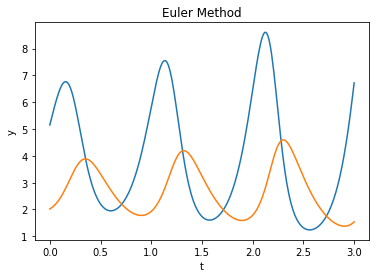

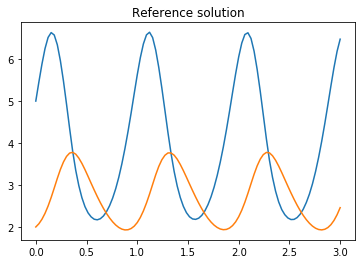

In [24]:
# Global parameters
alpha = 11
beta = 4
delta = 1
gamma = 4
initial = np.array([5,2])


# Lotka-Volterra equation
def LV(t,x):
    x1 = x[0]
    x2 = x[1]

    y1 = alpha*x1 - beta*x1*x2
    y2 = delta*x1*x2 - gamma*x2
    return np.array([y1,y2])

# Euler method
def forwardEuler(y0, h, t0 = 0, T = 3):
    
    N =int(T/h) #Amount of steps
    
    #List creation
    y_list = np.zeros((N,2))
    t_list = np.linspace(t0,T,N)

    
    y_list[0] = y0
    current_y = y0
    
    
    for i in range(N):
        next_y = current_y + h*LV(0,current_y)
        y_list[i] = next_y
        current_y = next_y
        
        
    plt.figure(0)   
    plt.plot(t_list, y_list)
    plt.title('Euler Method')
    plt.xlabel('t')
    plt.ylabel('y')
    
    
    return y_list




forwardEuler(initial, 0.01)

#Using built in routine for solving ivp
solve = solve_ivp(LV, [0,3], initial, t_eval = np.linspace(0,3, int(1/0.01)))

plt.figure(1)
plt.plot(solve.t,solve.y[0])
plt.plot(solve.t,solve.y[1])
plt.title('Reference solution')


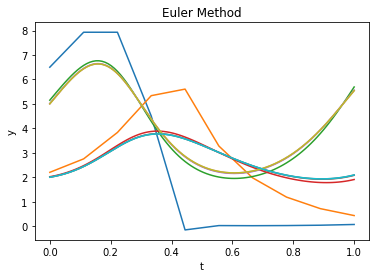

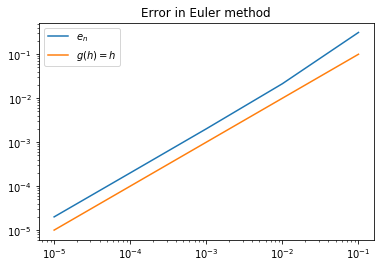

In [25]:
def plotErrorSlopeEuler(M): #For loglog plotting error

    Error_list = []
    h_list = np.zeros(M)
    
#     Evaluating error in different values of h
    for j in range(M):
        h_ = 10**(-(j+1))
        h_list[j] = h_

        #Creating solution list of euler and reference solution
        eul = forwardEuler(initial, h_, t0=0, T=1) 
        solve = solve_ivp(LV, [0,1], initial, t_eval = np.linspace(0,1, int(1/h_)))
        solveT = np.transpose(solve.y)

        globeError = solveT - eul
        Error_list.append(np.abs(globeError[1][-1])) #Calculating error at a point
    
    plt.figure(2)
    plt.loglog(h_list,Error_list, label='$e_n$')
    plt.loglog(h_list, h_list, label='$g(h)=h$')
    plt.legend()
    plt.title('Error in Euler method')
plotErrorSlopeEuler(5)

$\textbf{Heun method}$

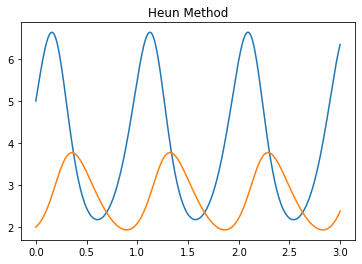

In [26]:


def heunMethod(y0, h = .01, t0 = 0, T = 3):
    
    N =int(T/h)
    
    y_list = np.zeros((N,2))
    t_list = np.linspace(t0,T,N)
    y_list[0] = y0
    
    current_y = y0
    for i in range(N-1):
        
        next_tilde = current_y + h*LV(0,current_y)
        
        next_y = current_y + (h/2)*(LV(0,current_y) + LV(0,next_tilde))
        
        y_list[i+1] = next_y
        current_y = next_y
    
    plt.figure(3)
    plt.plot(t_list, y_list)
    plt.title('Heun Method')

    return y_list

heunMethod(initial)
end = 0




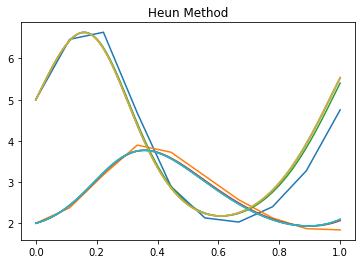

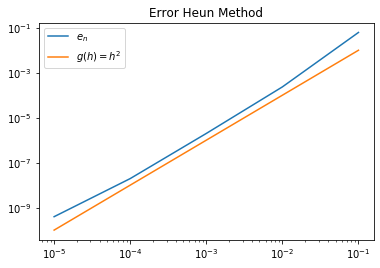

In [28]:
def plotErrorSlopeHeun(M):
    Error = []
    h_list = np.zeros(M)
    
    
    for j in range(M):
        h_ = 10**(-(j+1))
        h_list[j] = h_
        
        
        heun = heunMethod(initial, h=h_, T=1) 
        solve = solve_ivp(LV, [0,1], initial, t_eval = np.linspace(0,1, int(1/h_)))
        solveT = np.transpose(solve.y)

        globeError = np.abs(solveT - heun)
        Error.append(np.abs(globeError[1][-1]))#Calculating error at a point
    plt.figure(4)
    plt.loglog(h_list,Error, label='$e_n$')
    plt.loglog(h_list,h_list**2, label='$g(h)=h^2$')
    plt.legend()
    plt.title('Error Heun Method')
plotErrorSlopeHeun(5)

# Problem 11 d)

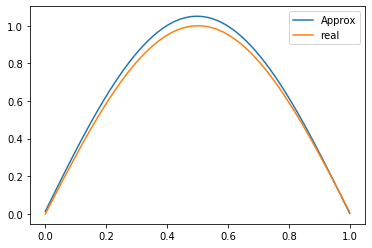

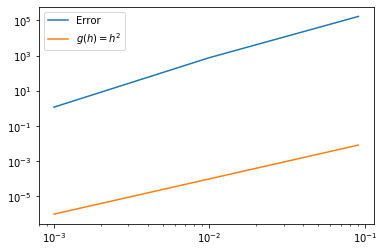

In [351]:
# Global 
omega2 = 9.81/1
alph = 1
bet = 0

# Matrix G_h = Iw^2 + A_h
def G_h(N,step):
    lengde = N
    Mat = np.eye(lengde)*(-2)
    for k in range(lengde-1):
        Mat[k+1][k] = 1
        Mat[k][k+1] = 1
    G = (1/step**2)* Mat + np.eye(lengde)*omega2
    return G

# Real solution for inital conditions theta(0)=1 theta'(0) = 0
def realSolution(t):
    return np.sin(np.sqrt(omega2)*t) #+ np.cos(np.sqrt(omega2)*t)


def thisNeedsABetterName(K):
    
    h_list=[]
    E_list=[]
    for j in range(K):
        M = 10**(j+1)
        h_step = 1/(M+1)
        h_list.append(h_step)
        
        
        
        y0 = np.ones(M)
        
        b = np.zeros(M)
        b[0] = -alph/h**2
        b[-1] = -bet/h**2
        G = G_h(M,h_step)
        
        Ginv = np.linalg.inv(G)
        sol = np.dot(Ginv,b)
        
        t_ = np.linspace(0,1,M)
        rSol = realSolution(t_)
        E_list.append(np.linalg.norm(sol-rSol))

    h_list = np.array(h_list)
    h_list2 = np.flip(h_list)
    
    plt.figure(1)
    plt.plot(t_, sol, label= 'Approx')
    plt.plot(t_, rSol, label='real')
    plt.legend()
    
    plt.figure(2)
    plt.loglog(h_list,E_list, label='Error')
    plt.loglog(h_list,h_list**2,label='$g(h)=h^2$')
    plt.legend()
    


    
thisNeedsABetterName(3)